,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
0,1,1989,1,1,SAC,Pervis Ellison,Louisville,11.0,474.0,11593.0,...,0.050,0.689,24.5,9.5,6.7,1.5,21.8,0.090,-0.5,4.4
1,2,1989,2,2,LAC,Danny Ferry,Duke,13.0,917.0,18133.0,...,0.393,0.840,19.8,7.0,2.8,1.3,34.8,0.092,-0.9,4.9
2,3,1989,3,3,SAS,Sean Elliott,Arizona,12.0,742.0,24502.0,...,0.375,0.799,33.0,14.2,4.3,2.6,55.7,0.109,0.2,13.5
3,4,1989,4,4,MIA,Glen Rice,Michigan,15.0,1000.0,34985.0,...,0.400,0.846,35.0,18.3,4.4,2.1,88.7,0.122,0.8,24.9
4,5,1989,5,5,CHH,J.R. Reid,UNC,11.0,672.0,15370.0,...,0.135,0.716,22.9,8.5,5.0,1.0,22.5,0.070,-2.9,-3.7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1922 entries, 0 to 1921
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1922 non-null   int64  
 1   year                       1922 non-null   int64  
 2   rank                       1922 non-null   int64  
 3   overall_pick               1922 non-null   int64  
 4   team                       1922 non-null   object 
 5   player                     1922 non-null   object 
 6   college                    1585 non-null   object 
 7   years_active               1669 non-null   float64
 8   games                      1669 non-null   float64
 9   minutes_played             1669 non-null   float64
 10  points                     1669 non-null   float64
 11  total_rebounds             1669 non-null   float64
 12  assists                    1669 non-null   float64
 13  field_goal_percentage      1665 non-null   float

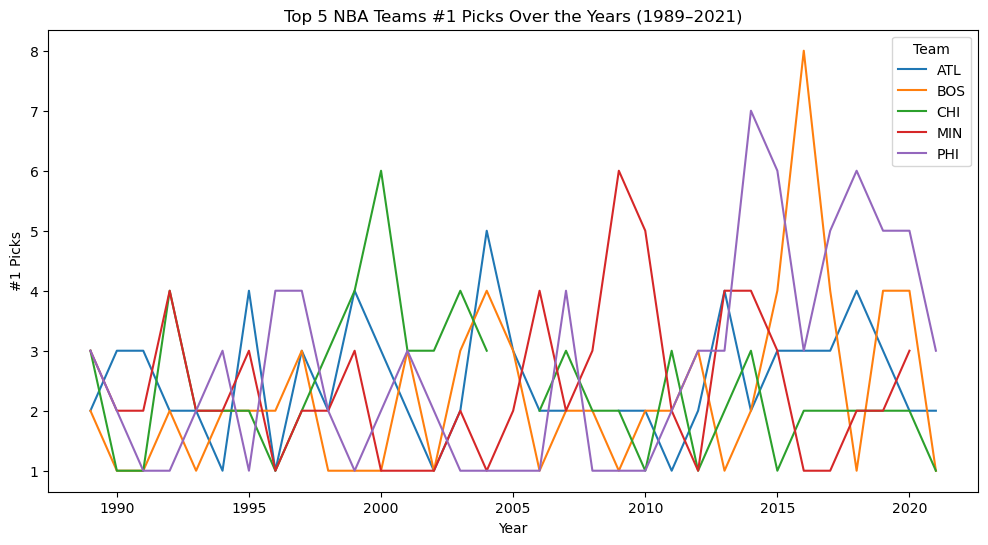

In [283]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset. Replace 'titanic.csv' with your own dataset file for your project.
# Ensure the dataset file exists and is in the same directory as this jupyter notebook.
nbadata = pd.read_csv('nbaplayersdraft.csv')

# Display the first few rows of the dataframe to ensure it is loaded correctly
display(nbadata.head())

nbadata.info()
nbadata.describe() 

#Question 1:[Which top 5 NBA teams landed the most #1 picks between 1989-2021] 
top_teams = nbadata.groupby('team').size().nlargest(5).index
top_nbadata = nbadata[nbadata['team'].isin(top_teams)]
top_nbadata.groupby(['year', 'team']).size().unstack().plot(figsize=(12,6))
plt.title("Top 5 NBA Teams #1 Picks Over the Years (1989–2021)")
plt.xlabel("Year")
plt.ylabel("#1 Picks")
plt.legend(title="Team")
plt.show()


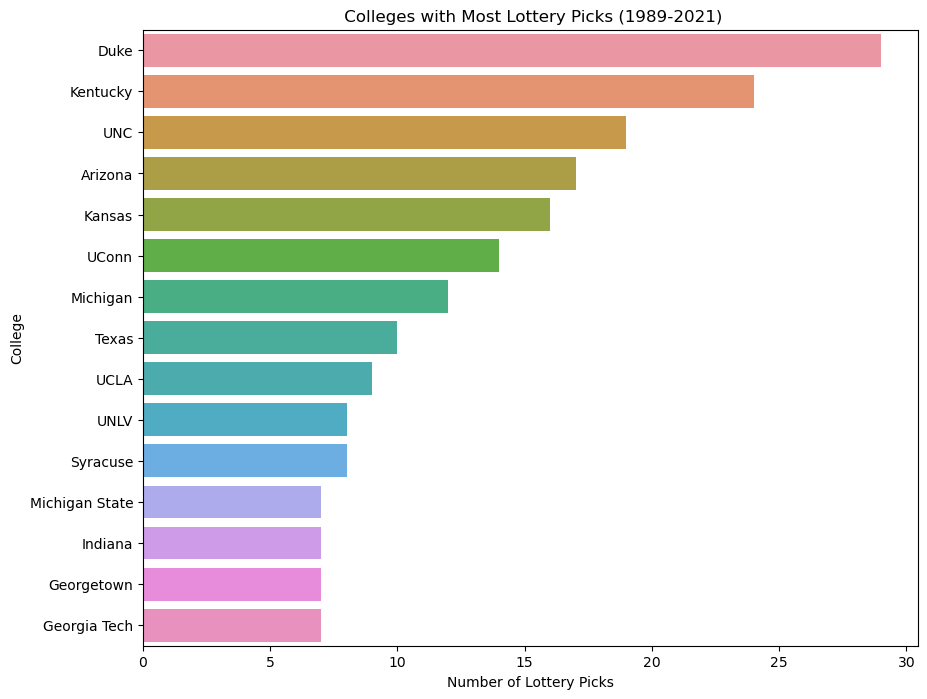

In [284]:
#Question 2:Which colleges produced the most lottery (top-14) picks between 1989–2021?
lottery = nbadata[nbadata['overall_pick'].between(1, 14)]
colleges = lottery['college'].value_counts().head(15)
plt.figure(figsize=(10, 8))
sns.barplot(x=colleges.values, y=colleges.index)
plt.title(' Colleges with Most Lottery Picks (1989-2021)')
plt.xlabel('Number of Lottery Picks')
plt.ylabel('College')
plt.show()

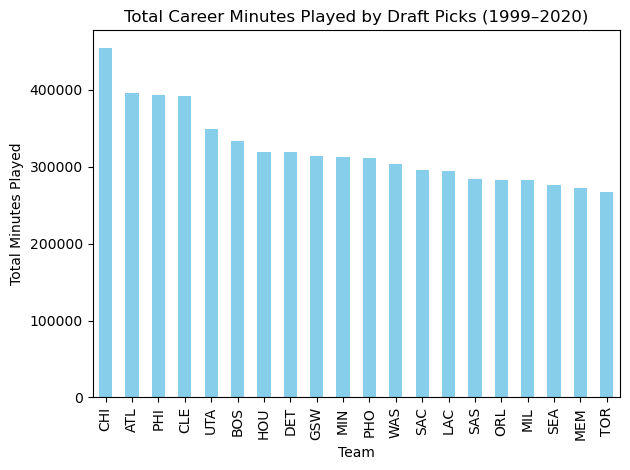

In [ ]:
#Question 3:Which top 5  NBA teams had draft picks whose players accumulated the most total career minutes between 1999–2020?
minutes = nbadata[(nbadata['year'] >= 1999) & (nbadata['year'] <= 2020)]
team_minutes = minutes.groupby('team')['minutes_played'].sum().sort_values(ascending=False)

# Get top 5 teams
top_5_teams = team_minutes.head(5)

# Create simple line plot
plt.figure(figsize=(10, 5))
plt.plot(top_5_teams.index, top_5_teams.values, marker='o', linewidth=2)

plt.title('Top 5 Teams: Total Minutes from Drafted Players (1999-2020)')
plt.xlabel('Teams')
plt.ylabel('Total Minutes Played')
plt.grid(True)
plt.show()


Text(0, 0.5, 'Total Rebounds')

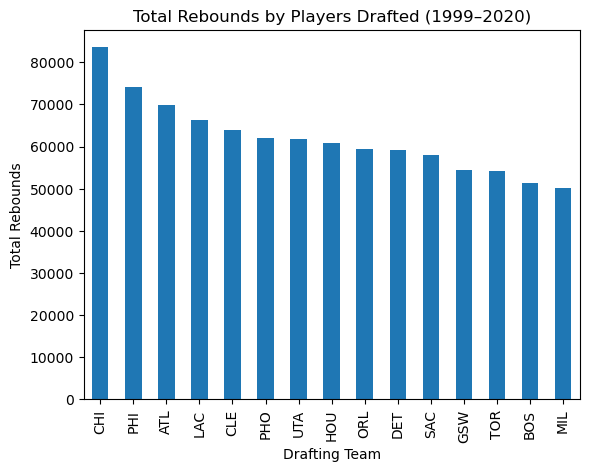

In [286]:
#Question 4:Which top 5 NBA teams drafted players with the most total rebounds between 1999–2020
nbadata_filtered = nbadata[(nbadata['year'] >= 1999) & (nbadata['year'] <= 2020)]
team_rebounds = nbadata_filtered.groupby('team')['total_rebounds'].sum().sort_values(ascending=False)
team_rebounds.head(15).plot(kind='bar')
plt.title('Total Rebounds by Players Drafted (1999–2020)')
plt.xlabel('Drafting Team')
plt.ylabel('Total Rebounds')

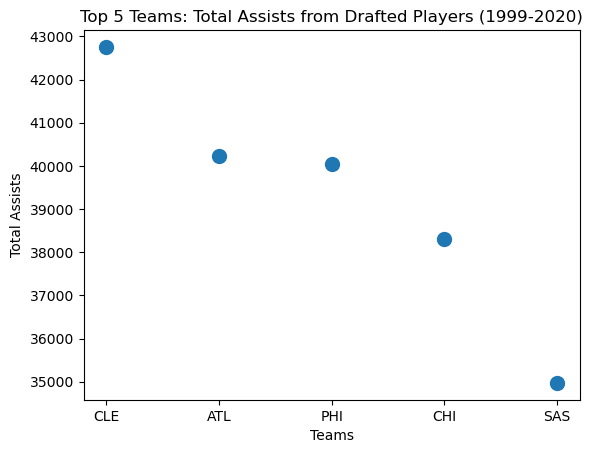

In [287]:
#Question 5 Which top 5 NBA teams drafted players wtih the most assists between 1999–2020?
assists = nbadata[(nbadata['year'] >= 1999) & (nbadata['year'] <= 2020)]
team_assists = assists.groupby('team')['assists'].sum().sort_values(ascending=False)
top_5_teams = team_assists.head(5)
plt.scatter(top_5_teams.index, top_5_teams.values, s=100)
plt.title('Top 5 Teams: Total Assists from Drafted Players (1999-2020)')
plt.xlabel('Teams')
plt.ylabel('Total Assists')
plt.show()

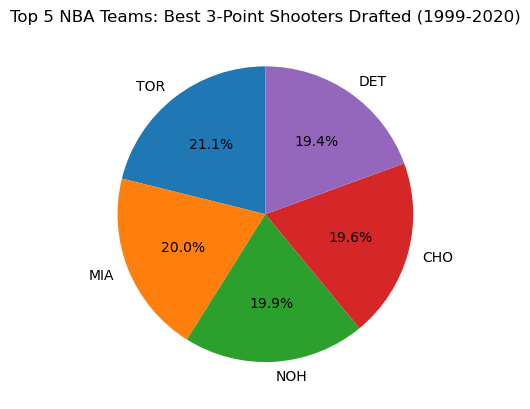

In [288]:
#Question 6:Which top 5 NBA teams drafted players with the best 3_point_percentage between 1999–2020?
nba_3pt = nbadata[(nbadata['year'] >= 1999) & (nbadata['year'] <= 2020) & (nbadata['3_point_percentage'].notna())]
team_3pt_stats = nba_3pt.groupby('team')['3_point_percentage'].mean()
player_count = nba_3pt.groupby('team')['player'].count()
top_5_teams = team_3pt_stats[player_count >= 5].sort_values(ascending=False).head(5)
plt.pie(top_5_teams.values, labels=top_5_teams.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 NBA Teams: Best 3-Point Shooters Drafted (1999-2020)')
plt.show()

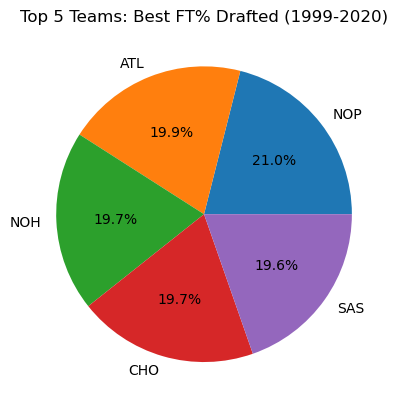

In [289]:
#Question 7: Which top 5 NBA teams drafted players with the best free throw percentage between 1999–2020?
freethrow = nbadata[(nbadata['year'] >= 1999) & (nbadata['year'] <= 2020) & (nbadata['free_throw_percentage'].notna())]
team_ft_stats = freethrow.groupby('team')['free_throw_percentage'].mean()
player_count = freethrow.groupby('team')['player'].count()
top_5_teams = team_ft_stats[player_count >= 5].sort_values(ascending=False).head(5)
plt.pie(top_5_teams.values, labels=top_5_teams.index, autopct='%1.1f%%')
plt.title('Top 5 Teams: Best FT% Drafted (1999-2020)')
plt.show()


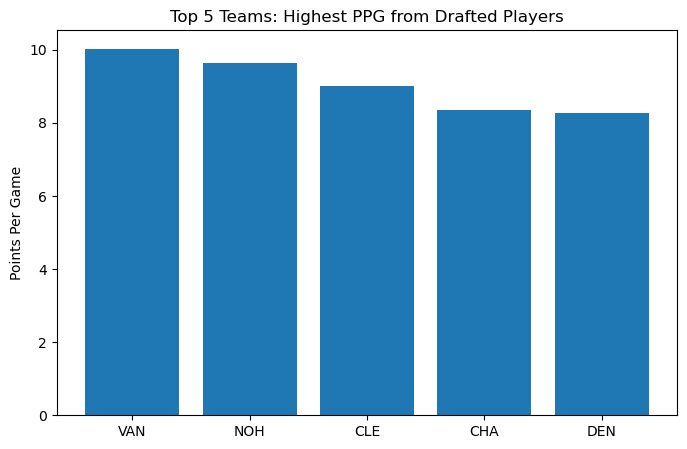

In [290]:
#Question 8: [Which top 5 NBA teams drafted players with the most points per game between 1999–2020]
points = nbadata[(nbadata['year'] >= 1999) & (nbadata['year'] <= 2020)]
team_ppg_stats = points.groupby('team')['points_per_game'].mean()
top_5_teams = team_ppg_stats.sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 5))
plt.bar(top_5_teams.index, top_5_teams.values)
plt.title('Top 5 Teams: Highest PPG from Drafted Players')
plt.ylabel('Points Per Game')
plt.show()

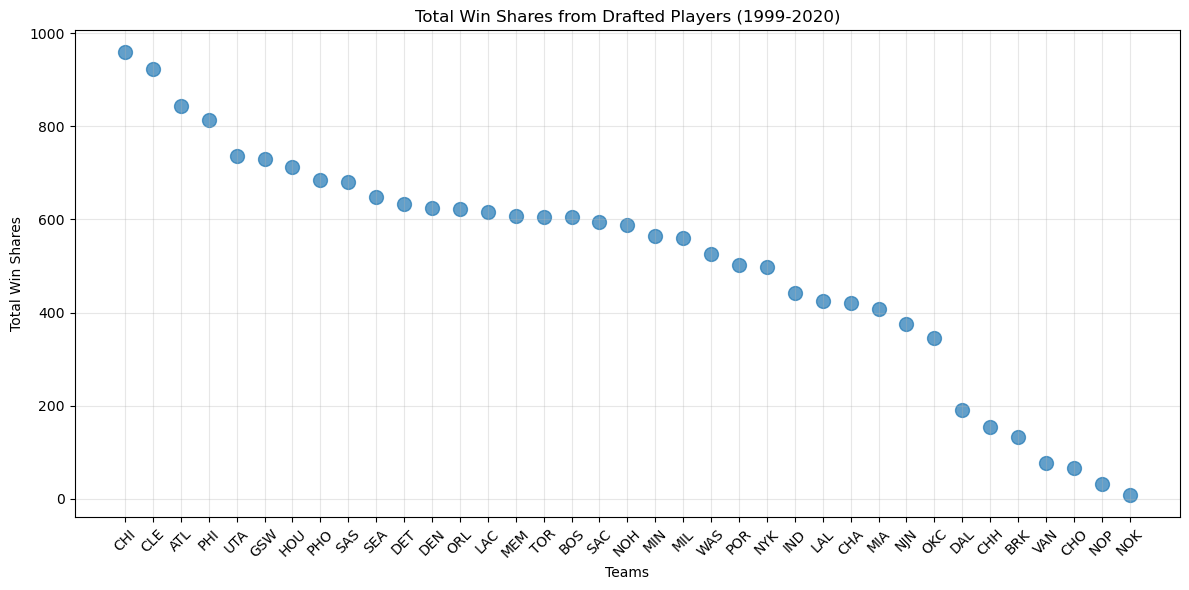

In [291]:
#Which top 5 NBA teams drafted players with the highest total win shares between 1999–2020?
win_shares = nbadata[(nbadata['year'] >= 1999) & (nbadata['year'] <= 2020)]
team_win_shares = win_shares.groupby('team')['win_shares'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.scatter(team_win_shares.index, team_win_shares.values, alpha=0.7, s=100)
plt.title('Total Win Shares from Drafted Players (1999-2020)')
plt.xlabel('Teams')
plt.ylabel('Total Win Shares')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

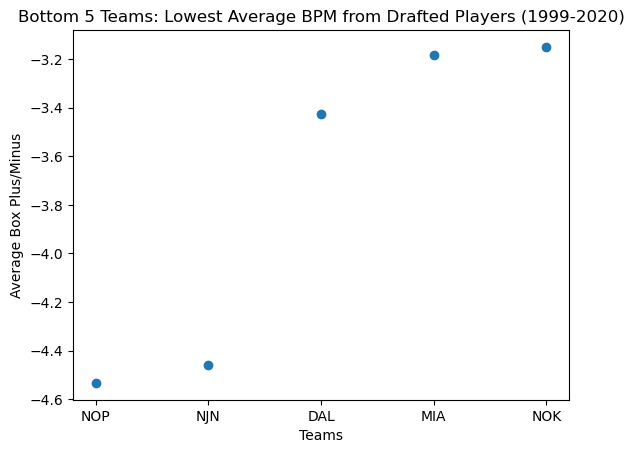

In [292]:
#Question 10: Which top 5 Nba team drafted players with the lowest box_plus_minus>
bpm = nbadata[(nbadata['year'] >= 1999) & (nbadata['year'] <= 2020)]
team_bpm = bpm.groupby('team')['box_plus_minus'].mean().sort_values()
bottom_5_teams = team_bpm.head(5)
plt.scatter(bottom_5_teams.index, bottom_5_teams.values)
plt.title('Bottom 5 Teams: Lowest Average BPM from Drafted Players (1999-2020)')
plt.xlabel('Teams')
plt.ylabel('Average Box Plus/Minus')
plt.show()
